<a href="https://colab.research.google.com/github/ugursirvermez/PyTorch_Education/blob/main/03_pytorch_nn_model_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Nöral Ağ Sınıflandırması

# Birinci Aşama

1000 1000
Yazdır: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]
Yazdır: [1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0

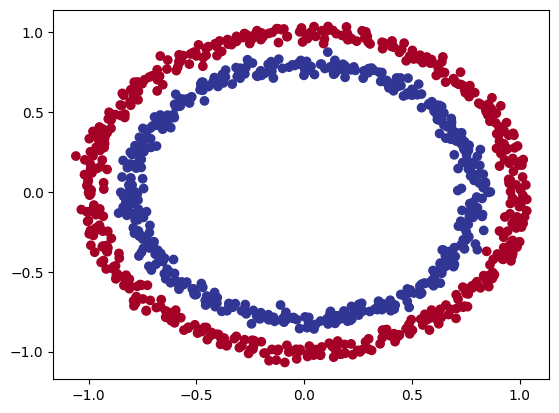

In [199]:
#Sınıflandırma için seçenekleri ve durumları değerlendireceğiz.
import sklearn #Bu kütüphaneyi açıkladık. Makine öğrenmesi kütüphanesi
from sklearn.datasets import make_circles #Çemberler verilerin oluşması
import pandas as pd
import matplotlib.pyplot as plt

#1000 örnek çember tasarlayalım.
n_samples = 1000

#Çemberleri oluşturalım.
X, y = make_circles(n_samples, noise = 0.03, random_state = 42) #Üç parametre alıyor. Biri yine sapma ve rastgele oranı diyebiliriz.
#make_circles iki parametre alır. Biri x ve diğeri y'dir doğrusal regresyon analizindeki parametrelerdir. y her zaman integer 0 veya 1 değeri alır. X ise sample yaratır.
print(len(X), len(y))
print(f"Yazdır: {X}")
print(f"Yazdır: {y}") #Çıktı olarak sadece 0 ve 1'ler alacağız y = x * weight + bias meselesi bu
#DataFrame yaratarak çemberleri göstereceğiz.
circles= pd.DataFrame({"X1":X[:, 0], "X2": X[:, 1],"label":y}) #tablonun kaç sütundan hangi verilerin çizileceğini söylüyoruz.
print(circles.head(10)) #Tabloyu yazdır.
# Grafik olarak çizdirelim
plt.scatter(x= X[:, 0], y=X[:, 1], c=y, cmap= plt.cm.RdYlBu) #Hangi değişkenleri yazdıracağımızı ve ikisinin renklerini belirledik.
#Bu çalıştığımız veri setinin küçük bir veri seti olduğunu hatırlayalım. O yüzden sklearn'de daha çok Toy Dataset kullanacağız.

# İkinci Aşama

In [200]:
print(X.shape) #make circle ile daha önceden kodlamasını yapmıştık.
print(y.shape) #çıktılara bakalım.

(1000, 2)
(1000,)


X'i ve y'yi ayrı ayrı yazdıralım

In [201]:
print(X)

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 ...
 [-0.13690036 -0.81001183]
 [ 0.67036156 -0.76750154]
 [ 0.28105665  0.96382443]]


In [202]:
print(y)

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

In [203]:
# Özellikler(Features) ve etiketleri (Labels) inceleyelim.
X_sample = X[0]
y_sample = y[0]

print(f"X'teki bir örneğin değeri: {X_sample} ve y'deki örneğin değeri: {y_sample}")
print(f"X'teki bir örneğin şekli: {X_sample.shape} ve y'deki örneğin şekli: {y_sample.shape}")

X'teki bir örneğin değeri: [0.75424625 0.23148074] ve y'deki örneğin değeri: 1
X'teki bir örneğin şekli: (2,) ve y'deki örneğin şekli: ()


##Verileri Tensör Haline Getirme

In [204]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split #Sklearn eğitim ve test şekilleri oluşmasını sağlayabiliriz.

#Verileri tensöre çevirelim. Daha öncede yapmıştık.
X = torch.from_numpy(X).type(torch.float) #X numpy.array olduğunu unutmayalım.
y = torch.from_numpy(y).type(torch.float) # bütün verileri float'a çevirdik.

print(X.dtype, y.dtype, type(X), type(y)) #Tensör olduklarını görürsünüz.
torch.manual_seed(42) # random_state ile aynı şeydir.
# 4 tane veri oluşturacağız. Bunların ikisi X test-train, ikisi y test-train şeklinde olacak.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Split yani yaratılacak ayırımları bize verecek
#train_test_split() -> sklearn.model_selection.train_test_split(*arrays, test_size=None -> 0.2 = %20, train_size=None, random_state=None, shuffle=True, stratify=None)[source]

print(len(X_train), len(X_test),len(y_train),len(y_test)) #800,200,800,200 çıktısı alırız.

torch.float32 torch.float32 <class 'torch.Tensor'> <class 'torch.Tensor'>
800 200 800 200


## Model İnşa Etme

In [205]:
#Model Oluşturma
import torch
from torch import nn

#Cihaz ayarlamasını yapalım.
device = "cuda" if torch.cuda.is_available() else "cpu" # eğer varsa GPU yoksa cpu'ya geç.

#X_train ve y_train gibi değişkenleri üstte tanımlamıştık. Bunları tekrar buraya yazmayacağız.
#Modeli aşama aşama yapalım.

class CircleModelV0(nn.Module):
	def __init__(self):
		super().__init__()

		#nn.Linear(doğrusal) katman(layer) inşa edelim. Bu çalıştığımız katman şekil, özellik dediğimiz kaç tane varsa o kadar oluşturuyoruz.
		self.layer_1 = nn.Linear(in_features=2, out_features=5) #Giriş=2, Çıkış=5 (2 özelliği 5'e çıkarttık) -> 1.katman
		self.layer_2 = nn.Linear(in_features=5, out_features=1) # Giriş=5 (5 özellik al bir önceki katmandan) Çıkış=1 -> 2.katman

	#yine forward edeceğiz.
	def forward(self, x):
		return self.layer_2(self.layer_1(x)) #x-> layer_1 -> layer_2-> çıktı.

# Instantiate (Başlatmayı) cihazda yapalım.
model_0 = CircleModelV0().to(device)
print(model_0)


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)


##Modeli Başlatma

In [206]:
#Modeli başlatalım.
model_0 = nn.Sequential(nn.Linear(in_features=2, out_features=5),
												nn.Linear(in_features=5, out_features=1)).to(device)
#Tahminler Yapalım
with torch.inference_mode():
	untrained_preds = model_0(X_test.to(device))
print(f"Tahminlerin uzunluğu: {len(untrained_preds)}, Şekli: {untrained_preds.shape}")
print(f"Test Örneklerinin uzunluğu: {len(X_test)}, Şekli: {X_test.shape}")
print(f"İlk 10 tahmin:\n{untrained_preds[:10]}")
print(f"İlk 10 etiket:\n {y_test[:10]}")

Tahminlerin uzunluğu: 200, Şekli: torch.Size([200, 1])
Test Örneklerinin uzunluğu: 200, Şekli: torch.Size([200, 2])
İlk 10 tahmin:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')
İlk 10 etiket:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


##Loss (BCE) Fonksiyonu ve Optimizer

In [207]:
#Loss, Optimizer ve Değerlendirme değerlerini ayarlama
#Bu değerler sizin belirlediğiniz probleme göre değişkenlik göstermektedir. Hassaslık seviyesini ayarlama için kullanılır.
#loss_fn = nn.BCELoss()# -> sigmoid çıkış aktivasyon hesabı ister.
#nn.Sequential(nn.Sigmoid(), nn.BCELoss()) # fonskiyonları katmanlarda çalıştırma
loss_fn = nn.BCEWithLogitsLoss() #Binary Cross Entropy Loss -> logiartma var.
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1) # yine öğrenme çıktısında optimize ediyoruz.
#Tutarlılık formülü -> True Positive / (True Positive + True Negative) * 100
#100 örneklemde ne kadar yüzde doğruluğa ulaşırız?
def accuracy_fn(y_true, y_pred): #yukarıdaki formülü uyguluyoruz.
	correct = torch.eq(y_true, y_pred).sum().item()
	acc = (correct/len(y_pred)) * 100
	return acc

## Eğitim Modeli Aşaması ve Ham Logaritmaları Tahmin İhtimallerine Göre Etiketler Oluşturma

In [208]:
#Eğitim modeli aşamasını oluşturma
#Eğitim döngüsünü oluşturalım, bunu daha öncede yapmıştık. Çıktılarımız ham logaritmalardan oluşmaktadır.
#Bu logaritmaları aktivasyon hesaplamaları (sigmoid, softmax vs.) tahminleri olasılıklara çevirme yapılmalı.
#Bunun sonucunda tahmin etiketlerini oluşturacağız.

#İlk 5 verimizi gözlemleyelim.
model_0.eval()
with torch.inference_mode():
	y_logits = model_0(X_test.to(device))[:5]
print(y_logits)

#Sigmoid aktivasyonu kullanarak modelimizin tahminlerini olasılığa çevirebiliriz.
y_pred_probs = torch.sigmoid(y_logits)
print(f"Prediction Probabilities: {y_pred_probs}")
print(f"PP Round:{torch.round(y_pred_probs)}")

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')
Prediction Probabilities: tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')
PP Round:tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')


In [209]:
#Tahminlerin Etiketlerini Bulalım
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#Eşitliği kontrol edelim
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Extra boyutlardan arındıralım
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

#EĞİTİM DONGUSUNU OLUSTURMA

In [210]:
torch.manual_seed(42)
torch.cuda.manual_seed(42) #farklı bir seed türü GPU'nun çoklu modellerinde kullanılabilir.

#devir oluşturalım
epochs = 100

#cihaza gerekli verileri yollayalım.
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
	#Eğit
	model_0.train()

	#1. Forward et
	y_logits = model_0(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits)) #logaritma -> tahmin olasılığı -> tahmin etiketi

	#2. Tutarlılık  ve Loss hesabı loss_fn -> logaritmalı bekliyor bizden BCEWithLogitLoss
	loss = loss_fn(y_logits, y_train) #nn.BCEWithLogitsLoss ham logaritma girişi bekliyor.
	# loss = loss_fn(torch.sigmoid(y_logits) #nn.BCELoss tahmin olasılıkları bekler.
	acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

	#3. Optimizer sıfır gradyen
	optimizer.zero_grad()

	#4. Loss Geri Yayılım
	loss.backward()

	#5. Optimizer adımı (Gradyen Azaltma)
	optimizer.step()

	#6. Test Aşaması
	model_0.eval()
	with torch.inference_mode():
		#1. forward
		test_logits = model_0(X_test).squeeze()
		test_pred = torch.round(torch.sigmoid(test_logits))

		#2. test loss/acc
		test_loss = loss_fn(test_logits, y_test)
		test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

	#Sonucu yazdıralım.
	if epoch % 10 == 0:
		print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc: .2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc: .2f}%")

Epoch: 0 | Loss: 0.69796, Acc:  51.88% | Test loss: 0.69440, Test acc:  58.00%
Epoch: 10 | Loss: 0.69590, Acc:  51.25% | Test loss: 0.69305, Test acc:  53.00%
Epoch: 20 | Loss: 0.69490, Acc:  51.62% | Test loss: 0.69254, Test acc:  49.50%
Epoch: 30 | Loss: 0.69435, Acc:  51.12% | Test loss: 0.69236, Test acc:  49.50%
Epoch: 40 | Loss: 0.69401, Acc:  50.88% | Test loss: 0.69232, Test acc:  51.00%
Epoch: 50 | Loss: 0.69378, Acc:  50.25% | Test loss: 0.69234, Test acc:  50.00%
Epoch: 60 | Loss: 0.69362, Acc:  50.00% | Test loss: 0.69239, Test acc:  51.50%
Epoch: 70 | Loss: 0.69351, Acc:  50.25% | Test loss: 0.69246, Test acc:  51.00%
Epoch: 80 | Loss: 0.69342, Acc:  49.88% | Test loss: 0.69254, Test acc:  50.00%
Epoch: 90 | Loss: 0.69336, Acc:  49.88% | Test loss: 0.69262, Test acc:  53.00%


## Bourke ve Mohandas'ın Fonsiyonu İndirme

helper_functions.py varsa indirme


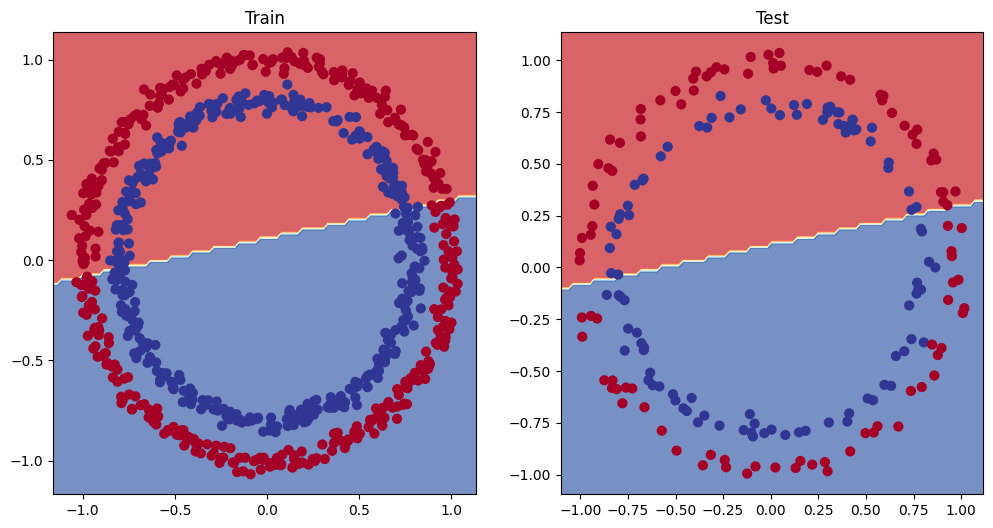

In [211]:
# Tahminler yapıp modelimizin değerlendirmesini yapalım.
import requests
from pathlib import Path

#David Bourke ve Goku Mohandas tarafindan yazilan fonksiyon
if Path("helper_functions.py").is_file():
	print("helper_functions.py varsa indirme")
else:
	print("helper_function.py indir")
	request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
	with open("helper_functions.py", "wb") as f: #aynı dosyayı aç ve içeriğini yaz.
		f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary
#Train verisi
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
#Test verisi
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

##Modeli İyileştirme ve Veri İle Çalışma
Daha çok katman eklenecek.

helper_functions.py varsa indirme
Epoch: 0 | Loss: 0.69396, Acc:  50.88% | Test loss: 0.69261, Test acc:  51.00%
Epoch: 100 | Loss: 0.69305, Acc:  50.38% | Test loss: 0.69379, Test acc:  48.00%
Epoch: 200 | Loss: 0.69299, Acc:  51.12% | Test loss: 0.69437, Test acc:  46.00%
Epoch: 300 | Loss: 0.69298, Acc:  51.62% | Test loss: 0.69458, Test acc:  45.00%
Epoch: 400 | Loss: 0.69298, Acc:  51.12% | Test loss: 0.69465, Test acc:  46.00%
Epoch: 500 | Loss: 0.69298, Acc:  51.00% | Test loss: 0.69467, Test acc:  46.00%
Epoch: 600 | Loss: 0.69298, Acc:  51.00% | Test loss: 0.69468, Test acc:  46.00%
Epoch: 700 | Loss: 0.69298, Acc:  51.00% | Test loss: 0.69468, Test acc:  46.00%
Epoch: 800 | Loss: 0.69298, Acc:  51.00% | Test loss: 0.69468, Test acc:  46.00%
Epoch: 900 | Loss: 0.69298, Acc:  51.00% | Test loss: 0.69468, Test acc:  46.00%


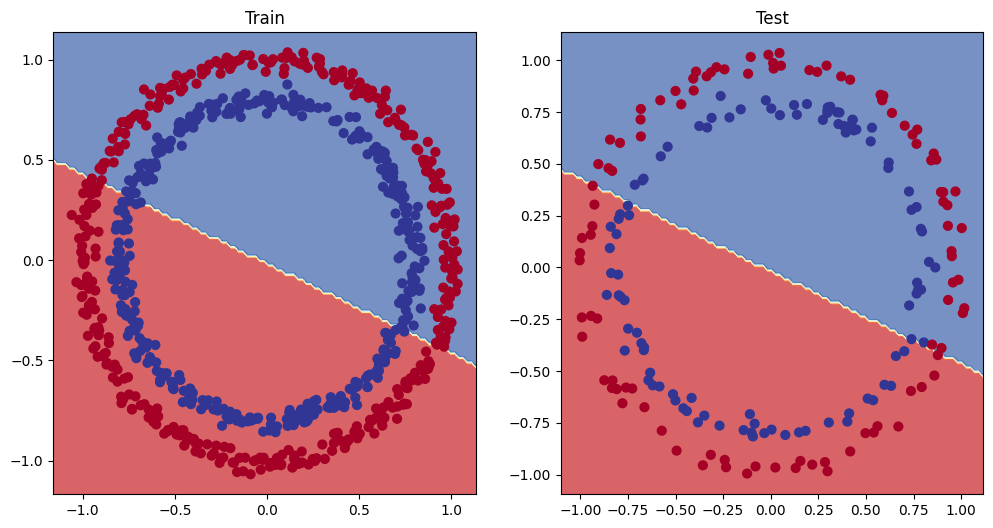

In [212]:
#Modeli kendi perspektifine göre iyileştirme
#Daha fazla gizli katman ekelyeceğiz. 5'ten 10'a katmanları çıkaracağız.
#YAPILAN DEĞİŞİKLİKLER
	#Katman Sayısı Arttırıldı. (gizli: 5 -> 10) (katman sayısı: 2 -> 3) (döngü: 100 -> 1000)
	#Loss Fonksiyonu ve Optimizer Değişti.
	#LR (Learning Rate) Değişti.
	#Aktivasyon Fonksiyonu Değişti.
import torch
from torch import nn
import requests
from pathlib import Path
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#David Bourke ve Goku Mohandas tarafindan yazilan fonksiyon
if Path("helper_functions.py").is_file():
	print("helper_functions.py varsa indirme")
else:
	print("helper_function.py indir")
	request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
	with open("helper_functions.py", "wb") as f: #aynı dosyayı aç ve içeriğini yaz.
		f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

device = "cuda" if torch.cuda.is_available() else "cpu"

n_samples = 1000
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

X = torch.from_numpy(X).type(torch.float) #X numpy.array olduğunu unutmayalım.
y = torch.from_numpy(y).type(torch.float) # bütün verileri float'a çevirdik.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

class CircleModelV1(nn.Module):
	def __init__(self):
		super().__init__()
		self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
		self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
		self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

	def forward(self, x):
		z = self.layer_1(x)
		z = self.layer_2(z)
		z = self.layer_3(z)
		return z
		#return (self.layer_3(self.layer_2(self.layer_1(x)))

def accuracy_fn(y_true, y_pred): #yukarıdaki formülü uyguluyoruz.
	correct = torch.eq(y_true, y_pred).sum().item()
	acc = (correct/len(y_pred)) * 100
	return acc


model_1 = CircleModelV1().to(device)

#Loss ve Optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

torch.manual_seed(42)
epochs=1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
	model_1.train()

	y_logits = model_1(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits))

	loss = loss_fn(y_logits, y_train)
	acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

	optimizer.zero_grad()

	loss.backward()
	optimizer.step()

	model_1.eval()
	with torch.inference_mode():
		#1. forward
		test_logits = model_1(X_test).squeeze()
		test_pred = torch.round(torch.sigmoid(test_logits))

		#2. test loss/acc
		test_loss = loss_fn(test_logits, y_test)
		test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

	if epoch % 100 == 0:
			print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc: .2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc: .2f}%")

#Train verisi
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
#Test verisi
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Veri ile Çalışma

In [213]:
#DATA -> VERİ
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#Veriyi Oluşturma
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

#Train ve test split
train_split = int(0.8 * len(X_regression))
x_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#model_2 -> model_1 gibi fakat nn.Sequential() ile yaziliyor
model_2 = nn.Sequential(nn.Linear(in_features=1, out_features=10),
												nn.Linear(in_features=10, out_features=10),
												nn.Linear(in_features=10, out_features=1)).to(device)

loss_fn =nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
	y_pred = model_2(x_train_regression)
	loss = loss_fn(y_pred, y_train_regression)
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	model_2.eval()
	with torch.inference_mode():
		test_pred = model_2(X_test_regression)
		test_loss = loss_fn(test_pred, y_test_regression)

	if epoch % 100 == 0:
			print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc: .2f}% | Test loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986, Acc:  51.00% | Test loss: 0.54143
Epoch: 100 | Loss: 0.09309, Acc:  51.00% | Test loss: 0.02901
Epoch: 200 | Loss: 0.07376, Acc:  51.00% | Test loss: 0.02850
Epoch: 300 | Loss: 0.06745, Acc:  51.00% | Test loss: 0.00615
Epoch: 400 | Loss: 0.06107, Acc:  51.00% | Test loss: 0.02004
Epoch: 500 | Loss: 0.05698, Acc:  51.00% | Test loss: 0.01061
Epoch: 600 | Loss: 0.04857, Acc:  51.00% | Test loss: 0.01326
Epoch: 700 | Loss: 0.06109, Acc:  51.00% | Test loss: 0.02127
Epoch: 800 | Loss: 0.05599, Acc:  51.00% | Test loss: 0.01426
Epoch: 900 | Loss: 0.05571, Acc:  51.00% | Test loss: 0.00603


#NON-LINEAR -> Doğrusal Olmayan Katmanlar

Epoch: 0 | Loss: 0.6929, Acc:  50.00% | Test loss: 0.69319, Test acc:  50.00%
Epoch: 100 | Loss: 0.6912, Acc:  52.88% | Test loss: 0.69102, Test acc:  52.50%
Epoch: 200 | Loss: 0.6898, Acc:  53.37% | Test loss: 0.68940, Test acc:  55.00%
Epoch: 300 | Loss: 0.6879, Acc:  53.00% | Test loss: 0.68723, Test acc:  56.00%
Epoch: 400 | Loss: 0.6852, Acc:  52.75% | Test loss: 0.68411, Test acc:  56.50%
Epoch: 500 | Loss: 0.6810, Acc:  52.75% | Test loss: 0.67941, Test acc:  56.50%
Epoch: 600 | Loss: 0.6751, Acc:  54.50% | Test loss: 0.67285, Test acc:  56.00%
Epoch: 700 | Loss: 0.6666, Acc:  58.38% | Test loss: 0.66322, Test acc:  59.00%
Epoch: 800 | Loss: 0.6516, Acc:  64.00% | Test loss: 0.64757, Test acc:  67.50%
Epoch: 900 | Loss: 0.6236, Acc:  74.00% | Test loss: 0.62145, Test acc:  79.00%


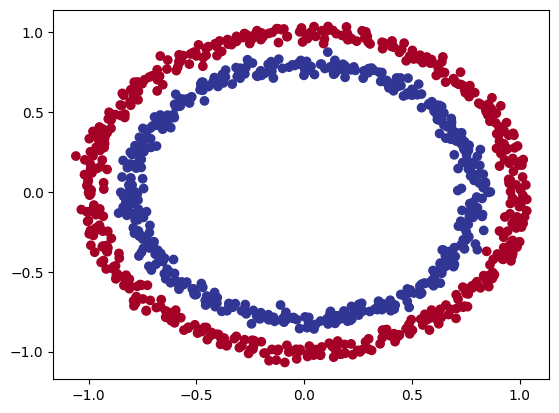

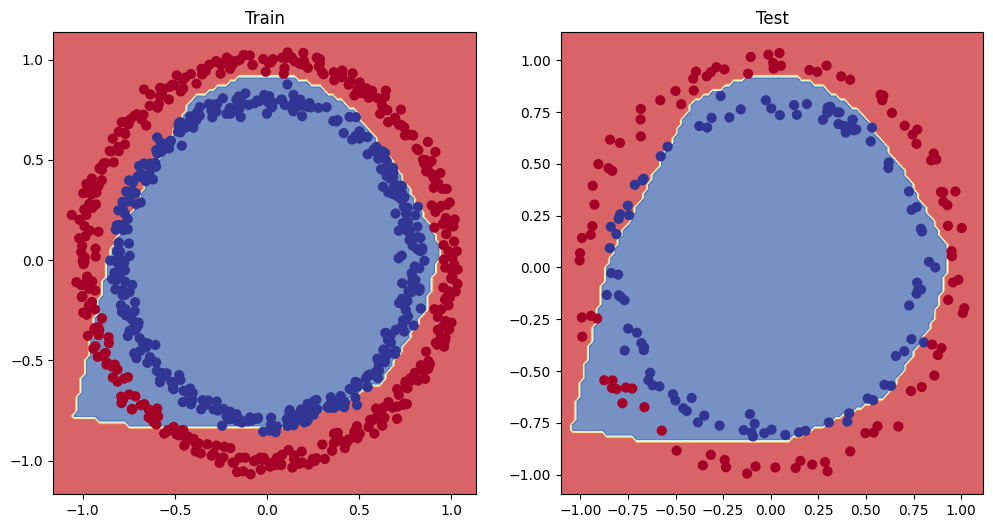

In [214]:
#Non-Linear tasarım yapalım.
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from torch import nn
from sklearn.model_selection import train_test_split

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

#veriyi tensor'e çevir
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Non-Linear Kısım
class CircleModelV2(nn.Module):
	def __init__(self):
		super().__init__()
		self.layer_1 = nn.Linear(in_features=2, out_features=10)
		self.layer_2 = nn.Linear(in_features=10, out_features=10)
		self.layer_3 = nn.Linear(in_features=10, out_features=1)
		self.relu = nn.ReLU() #Non-Linear olan denklemlerde kullanılır. Değer pozitif olmalı.

	def forward(self, x):
		#Non-Linear nasıl ilerler? relu ile tabi ki!
		return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
	model_3.train()

	y_logits = model_3(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits))

	loss = loss_fn(y_logits, y_train)
	acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	model_3.eval()
	with torch.inference_mode():
		test_logits = model_3(X_test).squeeze()
		test_pred = torch.round(torch.sigmoid(test_logits))
		test_loss = loss_fn(test_logits, y_test)
		test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

		if epoch % 100 == 0:
			print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc: .2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc: .2f}%")

#Train verisi
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
#Test verisi
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

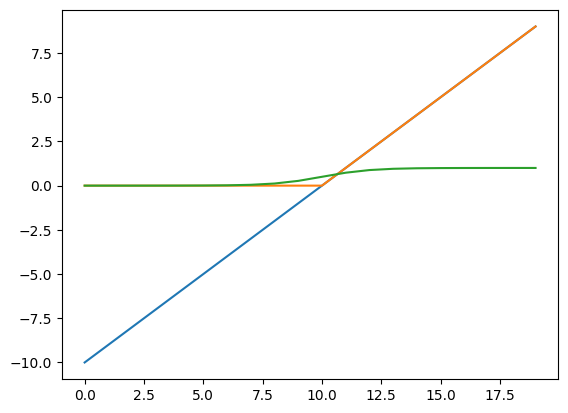

In [215]:
#tensör oluştur
A = torch.arange(-10, 10, 1, dtype=torch.float32)

plt.plot(A) #Doğrusal çizgi
#plt.plot(torch.relu(A)) # Doğrusal olmayan

def relu(x): #Relu denkleminde 0'dan + sonsuza giden bir hesaplama fonskiyonu. Kullanmayacağız, çalışma mantığı için yazdık.
	return torch.maximum(torch.tensor(0), x)

plt.plot(relu(A))

def sigmoid(x): #Bir S doğrusu çizer.
	return 1 / (1+ torch.exp(-x))
plt.plot(sigmoid(A))


#MULTICLASS CLASSIFICATION

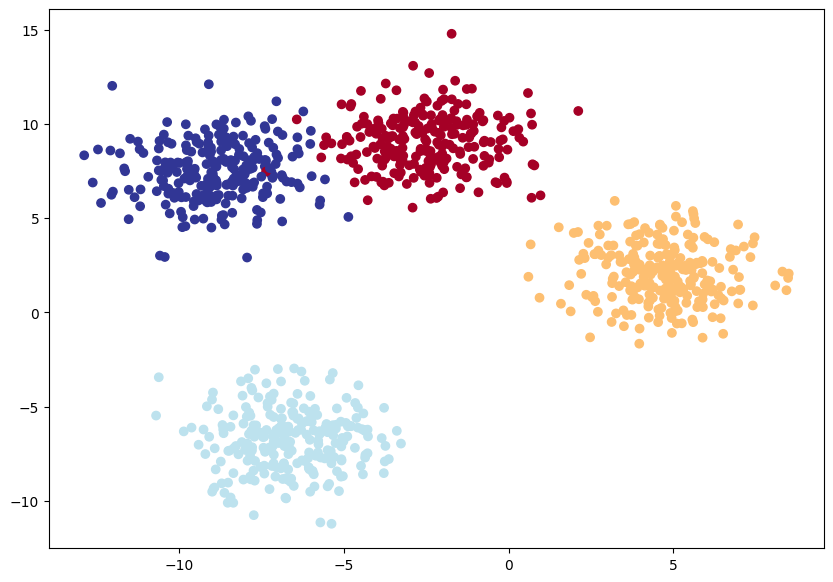

In [216]:
#KÜTÜPHANELER
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #Toy Dataset oluşturmak için kullanılan kütüphanedir.
from sklearn.model_selection import train_test_split

#Veri Setimizi Oluşturma
NUM_CLASSES = 4 # Kaç sınıf oluşturacağız?
NUM_FEATURES = 2 #Kaç özellik olacak yani kaç parametre var?
RANDOM_SEED = 42 #Seed oluşturma

#X ve Y değerlerimizi Toy DataSet'ten oluşturalım
X_blob, y_blob = make_blobs(n_samples = 1000, n_features = NUM_FEATURES, centers = NUM_CLASSES,
														 cluster_std = 1.5, # Kümelerin sapma miktarı
														 random_state = RANDOM_SEED)
#Verimizi Tensöre Çevirelim.
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) #Çıktı uzun Tensör olmalı ki işlemlerde sorun çıkmasın

#Eğitim ve Test İkilisini Oluşturma
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size = 0.2, random_state = RANDOM_SEED)

#Verimizi Görselleştirelim.
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu)

##MULTICLASS MODELI OLUSTURMA

In [217]:
#Multiclas Sınıflandırma Modeli
device = "cuda" if torch.cuda.is_available() else "cpu"

class BlobModel(nn.Module):
	def __init__(self,input_features, output_features, hidden_units=8): #normalde sadece "self" tanımlarız. Ancak burada farklılık var.
		super().__init__()
		self.linear_layer_stack = nn.Sequential(nn.Linear(in_features=input_features, out_features=hidden_units),
																						nn.ReLU(),
																						nn.Linear(in_features=hidden_units, out_features=hidden_units),
																						nn.ReLU(),
																						nn.Linear(in_features=hidden_units, out_features=output_features))

	def forward(self, x):
		return self.linear_layer_stack(x)

#Modeli cihaza yollayalım.
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)

#Loss Fonksiyonu ve Optimizer -> CrossEntropyLoss var. Optimizer Binary gibi aynı
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params= model_4.parameters(), lr=0.1)

#Dongu
epochs = 1000
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
	model_4.train() #Eğitimi başlat.

	#Burada da logaritmaları tahminlere ve olasılıklara çevireceğiz. Bunun için aktivasyona ihtiyacımız var.
	#Softmax aktivasyonu Multiclass için kullanılır.

	y_logits = model_4(X_blob_train) #Ham veri
	y_preds_probs = torch.softmax(y_logits, dim=1) #Softmax alındı (Olasılıklar)
	y_preds = torch.argmax(y_preds_probs, dim=1) # arg ile ondalık atılıp toplamı 1 veya 0 olacak şekilde net değer elde ediyoruz. (Etiketler)

	loss = loss_fn(y_logits, y_blob_train)
	acc = accuracy_fn(y_true = y_blob_train, y_pred = y_preds)

	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	model_4.eval()
	with torch.inference_mode():
		test_logits = model_4(X_blob_test)
		test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

		test_loss = loss_fn(test_logits, y_blob_test)
		test_acc = accuracy_fn(y_true = y_blob_test, y_pred = test_preds)

		if epoch % 100 == 0:
			print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc: .2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc: .2f}%")


Epoch: 0 | Loss: 1.1588, Acc:  40.38% | Test loss: 1.07554, Test acc:  48.00%
Epoch: 100 | Loss: 0.0331, Acc:  99.25% | Test loss: 0.02433, Test acc:  99.50%
Epoch: 200 | Loss: 0.0266, Acc:  99.25% | Test loss: 0.01651, Test acc:  99.50%
Epoch: 300 | Loss: 0.0250, Acc:  99.25% | Test loss: 0.01440, Test acc:  99.50%
Epoch: 400 | Loss: 0.0243, Acc:  99.25% | Test loss: 0.01335, Test acc:  99.50%
Epoch: 500 | Loss: 0.0238, Acc:  99.25% | Test loss: 0.01269, Test acc:  99.50%
Epoch: 600 | Loss: 0.0234, Acc:  99.25% | Test loss: 0.01218, Test acc:  99.50%
Epoch: 700 | Loss: 0.0231, Acc:  99.25% | Test loss: 0.01179, Test acc:  99.50%
Epoch: 800 | Loss: 0.0228, Acc:  99.25% | Test loss: 0.01147, Test acc:  99.50%
Epoch: 900 | Loss: 0.0225, Acc:  99.25% | Test loss: 0.01120, Test acc:  99.50%


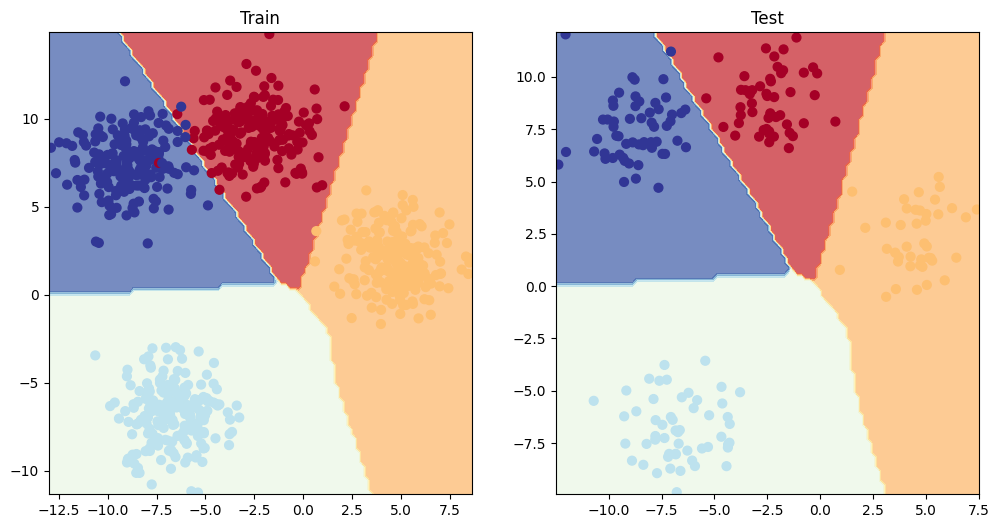

In [218]:
#Tahmin yapma
model_4.eval()
with torch.inference_mode():
	y_logits = model_4(X_blob_test)
	y_preds_probs = torch.softmax(y_logits, dim=1)
	y_preds = torch.argmax(y_preds_probs, dim=1)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

#Metrikler Ekleme

##Accuracy

In [219]:
!pip install torchmetrics

In [220]:
import torch
import torchmetrics #yoksa ekleyelim -> !pip install torchmetrics
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')